In [3]:
#Importamos las librerías a utilizar
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#import pingouin as pg
import numpy as np
#import statsmodels.api as sm
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

#Importamos los 2 data sources y los unimos en un único dataframe utilizando el order id
csv1 = pd.read_csv("../Dataset/datatable 1 v2.csv", sep = ';', decimal=',', low_memory=False)
csv2 = pd.read_csv("../Dataset/datatable 2 v2.csv", sep = ';', decimal=',')
df = pd.merge(csv1, csv2, on="ecomm_order_id", how="inner")

pd.set_option('display.max_columns', None)
df.head()

,ecomm_order_id,ecommerce,store,ecomm_creation_date_x,numero_lote,fecha_facturado,linea,marca,vArticulo_id,vTalle_Codigo,producto,quantity,client_price,PrecioCosto,ecomm_tipo_envio,VArticuloTalle_Costo,VArticuloTalle_PrecioRegular,ecomm_transporte_nombre,sucursal_original,ultima_sucursal,ColorPrimario,ProveedorId,Disciplina,Genero,sex,description,ecomm_creation_date_y,date_handling,date_invoiced,date_canceled,email,adress_id,latitude,longitude,payment,client_id
0,1100450257447-01,vtex,Dash,2/1/2021 18:04,8851.0,4/1/2021 15:06,INDUMENTARIA,ADIDAS FUTBOL,266-0576,XXL*,CAMISETA ADIDAS RIVER PLATE VISITANTE 20/21 2...,1,5439.2,3649.02,residential,4829.3400,8999.0,Envio a domicilio Estándar,NaN,NaN,ROJO ...,FQ7662,FUTBOL,HOMBRE ...,NaN,vtex,2/1/2021 18:04,2/1/2021 18:32,4/1/2021 15:16,\N,f8477045016e49dbb93d73735e31eb09@ct.vtex.com.br,\N,-57.637.779.235.839.800,-379.647.216.796.875,Mercado Pago,efdee559517295b10d370194a81b9f6d
1,1100502308757-01,vtex,Grid,3/1/2021 01:38,8854.0,4/1/2021 15:55,CALZADO ADULTOS,PUMA,961-1271,05 *,ZAPATILLAS PUMA MILE RIDER SUNNY 961-1271-05.0,1,9499.0,5420.50,residential,6052.0000,7899.0,Envio a domicilio Estándar,NaN,NaN,BLANCO,373443/05,MODA,MUJER ...,F,vtex,2/1/2021 22:38,2/1/2021 23:02,4/1/2021 16:03,\N,dc1b76171333439faaba9d2bbb46b258@ct.vtex.com.br,\N,-58.263.946.533.203.100,-347.640.495.300.293,Mercado Pago,6631617bf8504256ddb0efc8823ba702
2,1100502308757-01,vtex,Grid,3/1/2021 01:38,8854.0,4/1/2021 15:55,INDUMENTARIA,NIKE,302-0026,M *,REMERA NIKE ICON CLASH 302-0026-M,1,3839.0,2525.79,residential,3315.2600,4699.0,Envio a domicilio Estándar,NaN,NaN,BLANCO,CJ2040-100,MODA,MUJER ...,F,vtex,2/1/2021 22:38,2/1/2021 23:02,4/1/2021 16:03,\N,dc1b76171333439faaba9d2bbb46b258@ct.vtex.com.br,\N,-58.263.946.533.203.100,-347.640.495.300.293,Mercado Pago,6631617bf8504256ddb0efc8823ba702
3,1100691010085-01,vtex,Grid,3/1/2021 18:16,8840.0,4/1/2021 07:56,INDUMENTARIA,FILA DASS,432-0105,S *,REMERA FILA BIELLA BOX ITALY 432-0105-S,1,799.0,526.60,pickup,526.6000,799.0,Envio-24hs,(G08),NaN,BLANCO,LS180827 101,MODA,MUJER ...,F,vtex,3/1/2021 18:16,3/1/2021 18:41,4/1/2021 08:01,\N,f69943d53e2c4e9daa47e756cc23e84f@ct.vtex.com.br,\N,-5.862.068,-3.464.903,Mercado Pago,20ddb8685617bd8ce6171fa47461e506
4,1100692868583-01,vtex,Dash,3/1/2021 20:47,8854.0,4/1/2021 15:16,CALZADO ADULTOS,ADIDAS ARGENTINAS,261-1688,07.5,ZAPATILLAS ADIDAS X9000L1 261-1688-07.5,1,8999.0,4829.76,residential,5365.9976,6999.0,Envio a domicilio Estándar,NaN,NaN,NEGRO,EG4794,RUNNING,MUJER ...,F,vtex,3/1/2021 17:47,3/1/2021 18:11,4/1/2021 15:27,\N,e8b7ec3f47014aa094e3a7449a725b47@ct.vtex.com.br,\N,-6.630.628.204.345.700,1.818.662.452.697.750,Mercado Pago,0b3300233664137120bd84ce40752a1b


In [4]:
#Vistazo general de info del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58169 entries, 0 to 58168
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ecomm_order_id                58169 non-null  object 
 1   ecommerce                     58169 non-null  object 
 2   store                         58169 non-null  object 
 3   ecomm_creation_date_x         58169 non-null  object 
 4   numero_lote                   58161 non-null  float64
 5   fecha_facturado               56800 non-null  object 
 6   linea                         57913 non-null  object 
 7   marca                         57913 non-null  object 
 8   vArticulo_id                  58162 non-null  object 
 9   vTalle_Codigo                 58168 non-null  object 
 10  producto                      58169 non-null  object 
 11  quantity                      58169 non-null  int64  
 12  client_price                  58158 non-null  float64
 13  P

Eliminaremos las siguientes columnas ya que no serán de utilidad para el análisis:
- numero_lote: no propociona información útil
- fecha_facturado: contiene la misma información que date_invoiced (con minutos de diferencia), pero menos cantidad de registros
- PrecioCosto: Debería contener la misma información que VArticuloTalle_Costo. Nos quedamos con la segunda porque tiene mayor cantidad de registros
- sucursal_original: contiene muy pocos datos
- ultima_sucursal: contiene muy pocos datos
- description: es la descripción del ecommerce, o sea que contiene la misma información que el campo "ecommerce"
- ecomm_creation_date_y: es la misma fecha que ecomm_creation_date_x, quedó duplicada al unir los 2 data sources
- ecomm_tipo_envio: No proporciona información útil

In [5]:
#Eliminamos las columnas que no vamos a usar
df.drop(['numero_lote', 'fecha_facturado', 'PrecioCosto','sucursal_original','ultima_sucursal','description','ecomm_creation_date_y','ecomm_tipo_envio'], axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58169 entries, 0 to 58168
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ecomm_order_id                58169 non-null  object 
 1   ecommerce                     58169 non-null  object 
 2   store                         58169 non-null  object 
 3   ecomm_creation_date_x         58169 non-null  object 
 4   linea                         57913 non-null  object 
 5   marca                         57913 non-null  object 
 6   vArticulo_id                  58162 non-null  object 
 7   vTalle_Codigo                 58168 non-null  object 
 8   producto                      58169 non-null  object 
 9   quantity                      58169 non-null  int64  
 10  client_price                  58158 non-null  float64
 11  VArticuloTalle_Costo          57913 non-null  float64
 12  VArticuloTalle_PrecioRegular  57913 non-null  float64
 13  e

In [6]:
#Vistazo general de medidas descriptivas de variables cuantitativas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,58169.0,1.017810,0.666784,1.0,1.00,1.0000,1.00,150.00
client_price,58158.0,6886.332342,4315.875995,-1199.8,4399.00,5999.0000,7999.00,27999.00
VArticuloTalle_Costo,57913.0,4434.435572,2627.692111,0.1,2940.64,4024.3641,5262.63,18946.84
VArticuloTalle_PrecioRegular,57913.0,7969.132756,4995.452561,29.0,4899.00,6699.0000,9499.00,35999.00


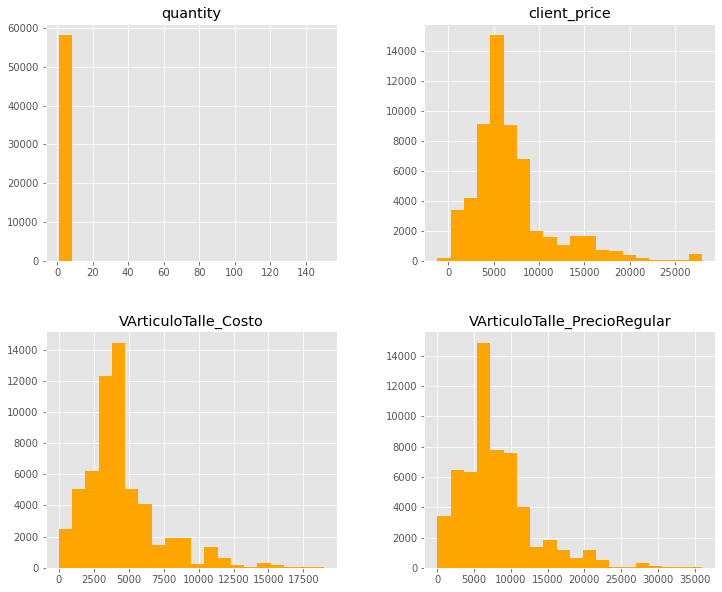

In [7]:
# Histogramas de variables cuantitativas
df.hist(figsize=(12,10), color='orange', bins=20)
plt.show()

Se puede notar que client_price tiene valores negativos, lo cual no tiene sentido y constituye un error de carga en los datos.
Vamos a eliminar esos registros para que no afecten el análisis.

In [8]:
#Eliminamos los registros con precios negativos
df = df.drop(df[df['client_price'] < 0].index)
df[df['client_price'] < 0]

,ecomm_order_id,ecommerce,store,ecomm_creation_date_x,linea,marca,vArticulo_id,vTalle_Codigo,producto,quantity,client_price,VArticuloTalle_Costo,VArticuloTalle_PrecioRegular,ecomm_transporte_nombre,ColorPrimario,ProveedorId,Disciplina,Genero,sex,date_handling,date_invoiced,date_canceled,email,adress_id,latitude,longitude,payment,client_id


In [9]:
#Análisis particular de la variable "client_price"
variable = 'client_price'

minimo = df[variable].min()
maximo = df[variable].max()
media = df[variable].mean()
mediana = df[variable].median()
moda = df[variable].mode()[0]
stdev = df[variable].std()
varian = df[variable].var()

print('Minimo: ' + str(minimo))
print('Maximo: ' + str(maximo))
print('Media: ' + str(round(media,2)))
print('Mediana: ' + str(mediana))
print('Moda: ' + str(moda))
print('Desviación estándar: ' + str(round(stdev,2)))
print('Varianza: ' + str(round(varian,2)))

Minimo: 0.0
Maximo: 27999.0
Media: 6886.61
Mediana: 5999.0
Moda: 5999.0
Desviación estándar: 4315.69
Varianza: 18625177.46


<Figure size 720x648 with 0 Axes>

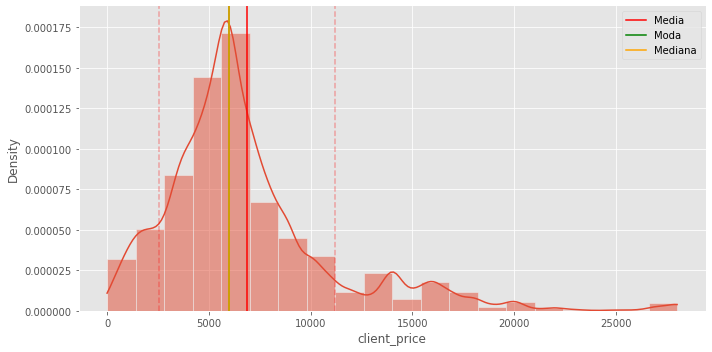

In [10]:
#Histograma y curva de densidad de client_price con media, mediana y moda
plt.figure(figsize=(10, 9))
ax = sns.displot(data=df, 
                 x = variable, 
                 kde=True,
                stat="density",
                height=5,
                aspect=2,
                bins = 20)

plt.axvline(media,
           color = "red",
           label = 'Media')

plt.axvline(media - stdev,
           color = "red",
           alpha = 0.3,
           linestyle = "--")

plt.axvline(media + stdev,
           color = "red",
           alpha = 0.3,
           linestyle = "--")

plt.axvline(moda,
           color = "green",
           alpha = 1,
           label = 'Moda')

plt.axvline(mediana,
           color = "orange",
           alpha = 1,
           label = 'Mediana')

plt.legend()

plt.show()

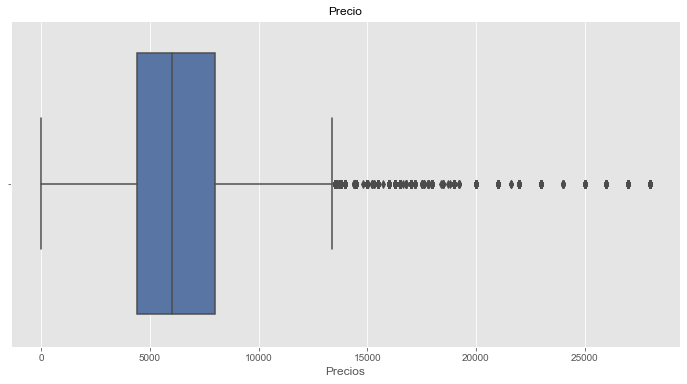

In [11]:
#Boxplot para client_price
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['client_price'])
plt.title('Precio')
plt.xlabel('Precios')
plt.show()

In [12]:
#Análisis particular de la variable "VArticuloTalle_Costo"
variable = 'VArticuloTalle_Costo'

minimo = df[variable].min()
maximo = df[variable].max()
media = df[variable].mean()
mediana = df[variable].median()
moda = df[variable].mode()[0]
stdev = df[variable].std()
varian = df[variable].var()

print('Minimo: ' + str(minimo))
print('Maximo: ' + str(maximo))
print('Media: ' + str(round(media,2)))
print('Mediana: ' + str(mediana))
print('Moda: ' + str(moda))
print('Desviación estándar: ' + str(round(stdev,2)))
print('Varianza: ' + str(round(varian,2)))

Minimo: 0.1
Maximo: 18946.84
Media: 4434.43
Mediana: 4024.3641
Moda: 3452.13
Desviación estándar: 2627.74
Varianza: 6905003.74


<Figure size 720x648 with 0 Axes>

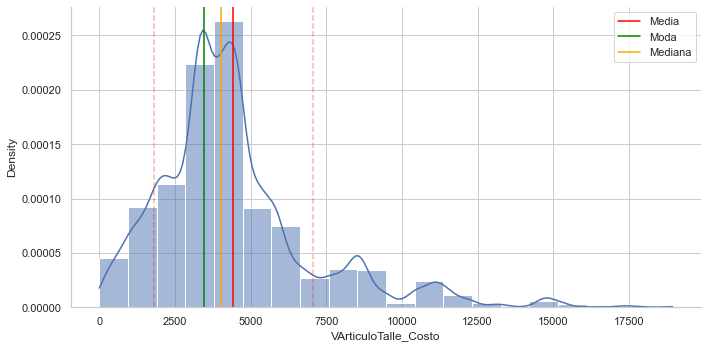

In [13]:
#Histograma y curva de densidad de VArticuloTalle_Costo con media, mediana y moda
plt.figure(figsize=(10, 9))
ax = sns.displot(data=df, 
                 x = variable, 
                 kde=True,
                stat="density",
                height=5,
                aspect=2,
                bins=20)

plt.axvline(media,
           color = "red",
           label = 'Media')

plt.axvline(media - stdev,
           color = "red",
           alpha = 0.3,
           linestyle = "--")

plt.axvline(media + stdev,
           color = "red",
           alpha = 0.3,
           linestyle = "--")

plt.axvline(moda,
           color = "green",
           alpha = 1,
           label = 'Moda')

plt.axvline(mediana,
           color = "orange",
           alpha = 1,
           label = 'Mediana')

plt.legend()

plt.show()

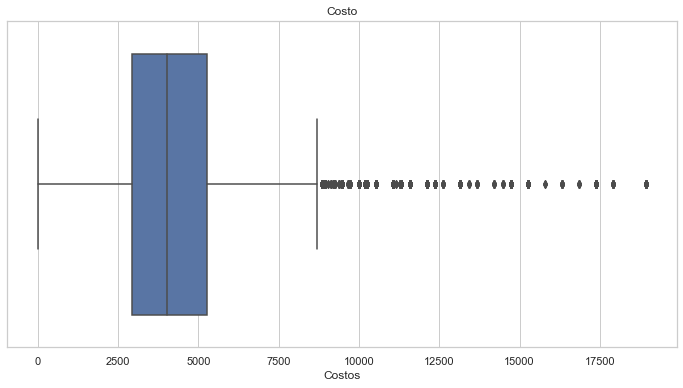

In [14]:
#Boxplot para VArticuloTalle_Costo
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['VArticuloTalle_Costo'])
plt.title('Costo')
plt.xlabel('Costos')
plt.show()

In [15]:
#Análisis de valores únicos de variables categóricas
cat_columns=['ecommerce', 'store', 'linea', 'marca','vTalle_Codigo','ecomm_transporte_nombre','ColorPrimario','Disciplina','Genero','payment','sex']

for i in cat_columns:
    print(df[i].name)
    print(df[i].unique())

ecommerce
['vtex' 'meli']
store
['Dash' 'Grid' 'Mark' 'Fila' 'Adidas Performance' 'Nike' 'Puma'
 'Rebook Argentina' 'Stadium' 'Adidas Original' 'Umbro']
linea
['INDUMENTARIA        ' 'CALZADO ADULTOS     ' 'ACCESORIOS-REPUESTOS'
 'MEDIAS              ' 'CALZADO NIÑOS       ' 'BOLSOS              ' nan]
marca
['ADIDAS FUTBOL       ' 'PUMA                ' 'NIKE                '
 'FILA DASS           ' 'ADIDAS ARGENTINAS   ' 'TOPPER              '
 'FOOTY MEILY         ' 'NEW BALANCE         ' 'JOHN FOOS ARGENTINA '
 'NIKE ANNEX          ' 'FALLEN              ' 'ATLETIC SERV SA     '
 'O´NEILL             ' 'REEBOK ARGENTINA    ' 'KLALUTEX            '
 'REVES               ' 'BESS II             ' 'CULTURA             '
 'SHOTER              ' 'UNDER ARMOUR        ' 'ZUMM                '
 'GOORIN              ' 'UMBRO DASS          ' 'SPORT COMPLEMENTS   '
 'JAGUAR              ' 'NUEVO EMPORIO       ' 'ASICS ARGENTINA     '
 'JANSPORT            ' 'NIKEGOLF            ' nan 'KONNA   

In [16]:
#Normalización de datos de variables categóricas

#linea: quitamos los espacios y reemplazamos los NaN por "DESCONOCIDO"
df['linea'] = df['linea'].str.strip()
df['linea'] = df['linea'].fillna('DESCONOCIDA')

#marca: quitamos los espacios y reemplazamos los NaN por "DESCONOCIDA"
df['marca'] = df['marca'].str.strip()
df['marca'] = df['marca'].fillna('DESCONOCIDA')

#ecomm_transporte_nombre: quitamos espacios y unificamos los que significan lo mismo
df['ecomm_transporte_nombre'] = df['ecomm_transporte_nombre'].str.strip()
df['ecomm_transporte_nombre'] = df['ecomm_transporte_nombre'].replace(to_replace =["Estándar a domicilio", "Normal a domicilio"], value ="Envio a domicilio Estándar")
df['ecomm_transporte_nombre'] = df['ecomm_transporte_nombre'].replace(to_replace =["Transporte interno Essential Meli"], value ="Transporte interno Essential")
df['ecomm_transporte_nombre'] = df['ecomm_transporte_nombre'].replace(to_replace =["Express a domicilio", "Envio-24hs"], value ="Prioritario a domicilio")

#ColorPrimario: quitamos los espacios y reemplazamos los NaN por "DESCONOCIDO"
df['ColorPrimario'] = df['ColorPrimario'].str.strip()
df['ColorPrimario'] = df['ColorPrimario'].fillna('DESCONOCIDO')

#Disciplina: quitamos espacios, reemplazamos NaN por "DESCONOCIDA" y unificamos los que significan lo mismo
df['Disciplina'] = df['Disciplina'].str.strip()
df['Disciplina'] = df['Disciplina'].fillna('DESCONOCIDA')
df['Disciplina'] = df['Disciplina'].replace(to_replace =["TENNIS"], value ="TENIS")

#Genero: quitamos los espacios y reemplazamos los NaN por "DESCONOCIDO"
df['Genero'] = df['Genero'].str.strip()
df['Genero'] = df['Genero'].fillna('DESCONOCIDO')

#payment: unificamos los que significan lo mismo y reemplazamos '\\N' por "Desconocido"
df = df.replace({"creditCard": "credit_card","account_money": "MercadoPago", "\\N":"Desconocido"})

#sex: reemplazamos NaN por "Desconocido"
df['sex'] = df['sex'].fillna('DESCONOCIDO')


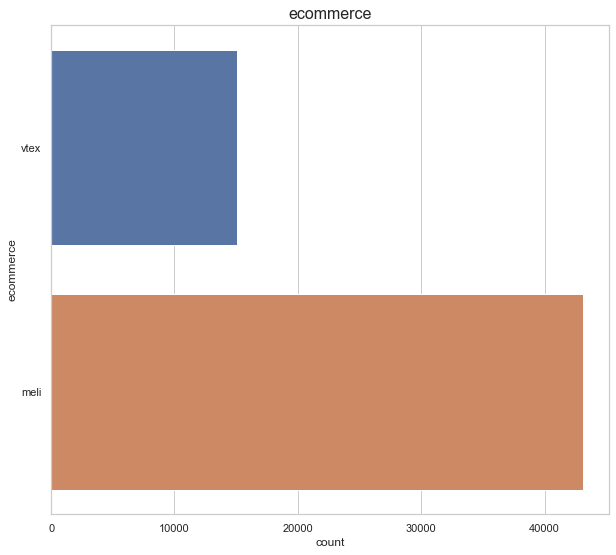

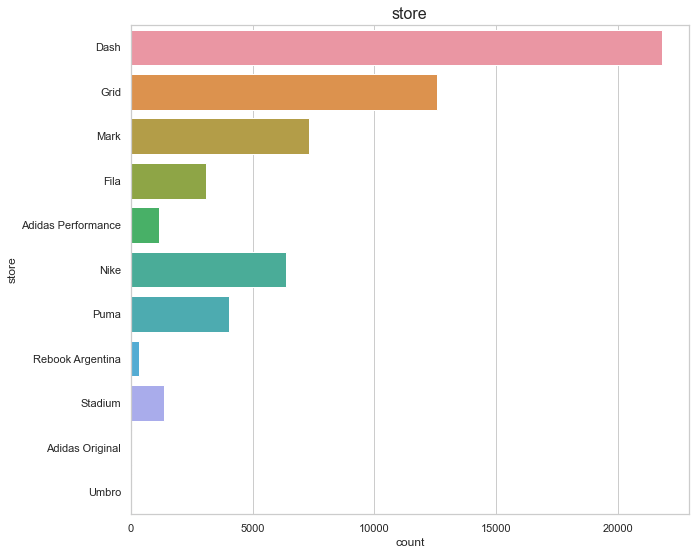

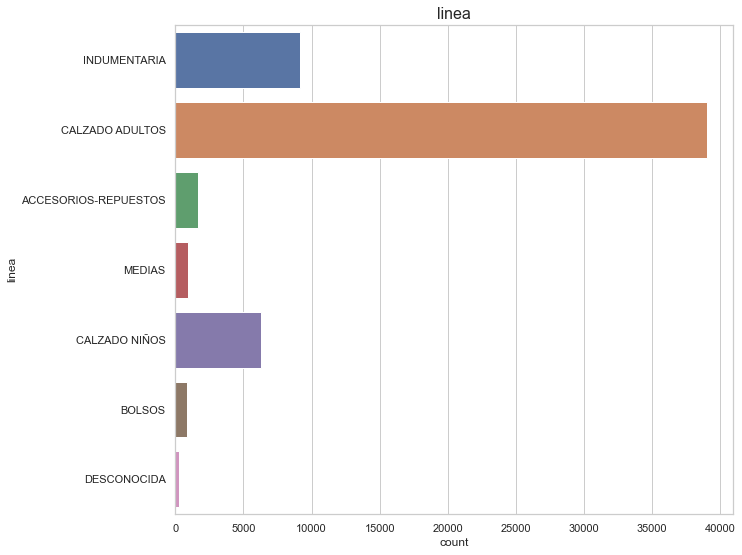

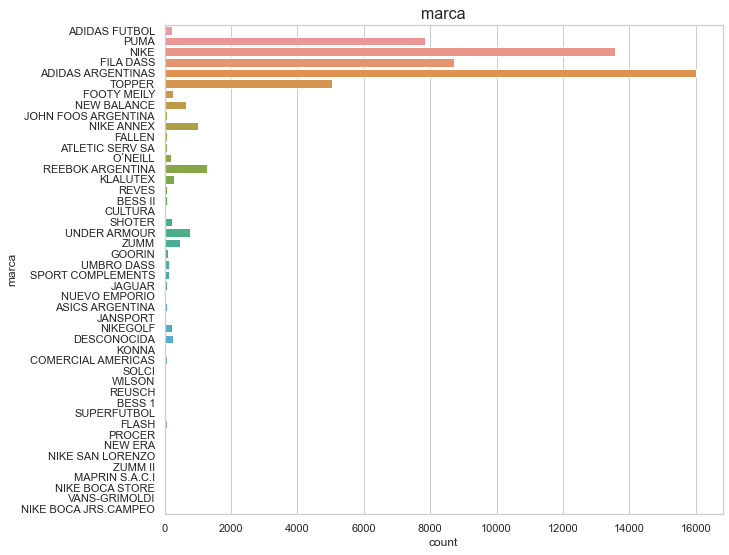

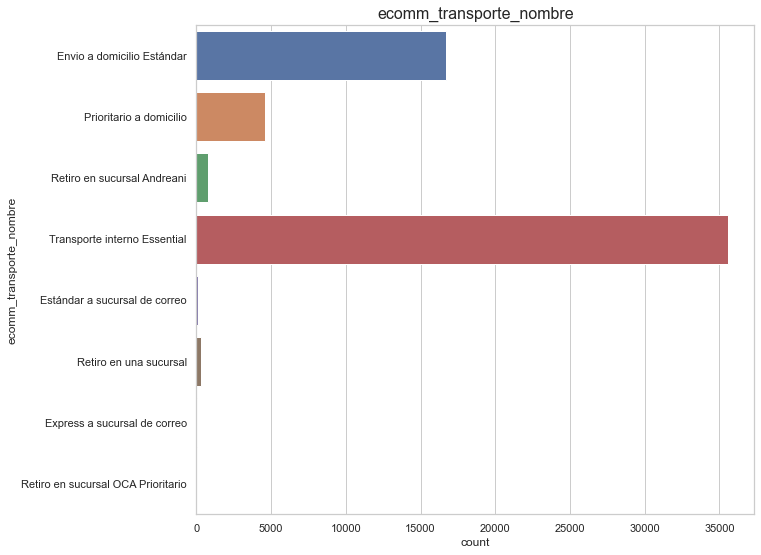

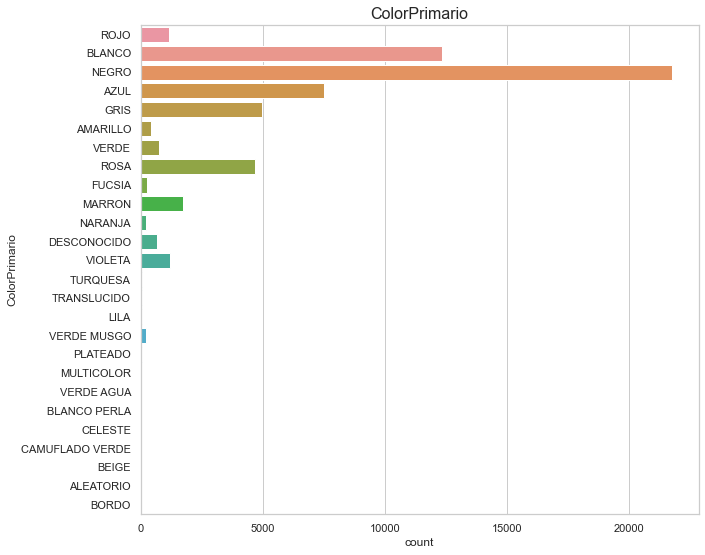

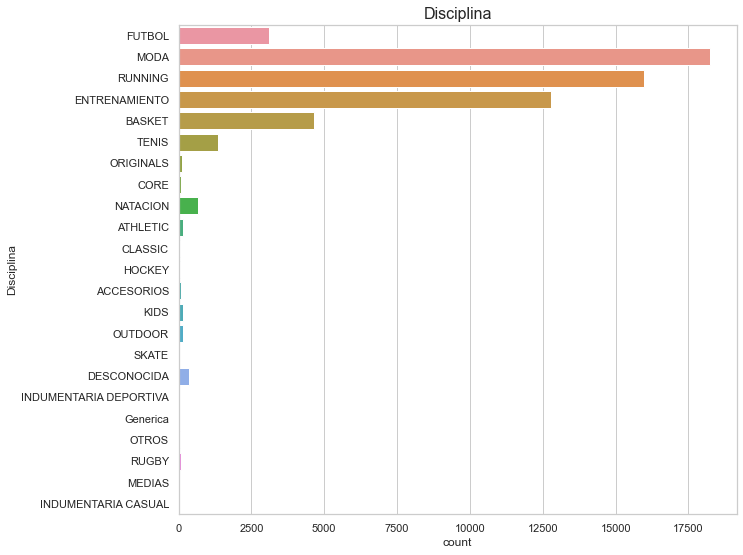

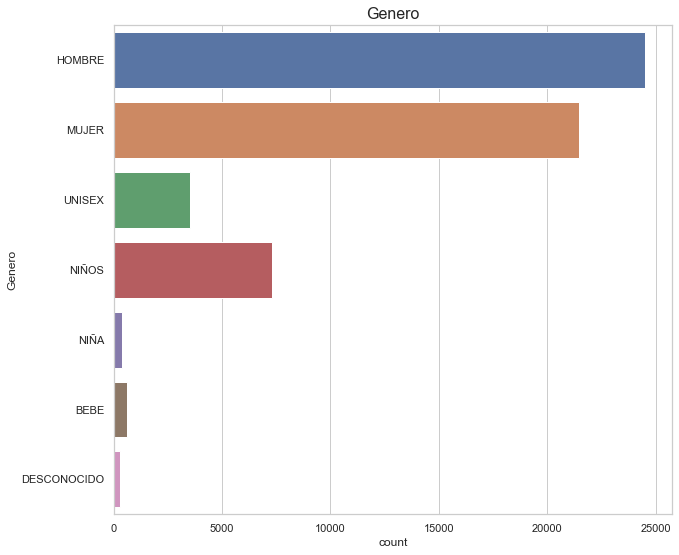

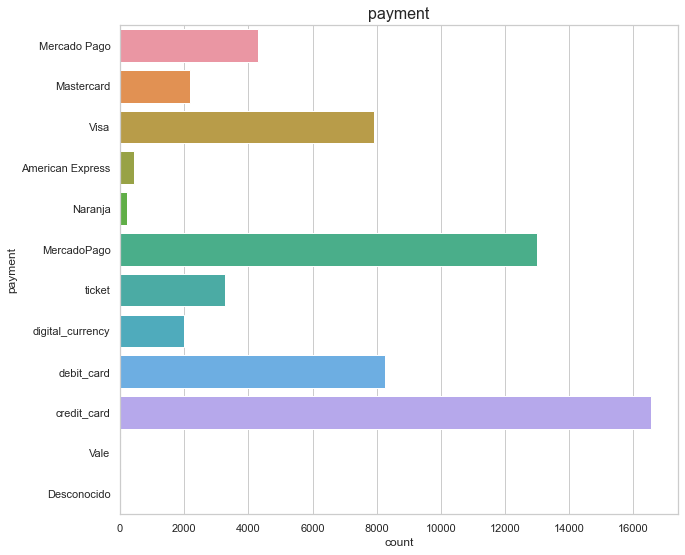

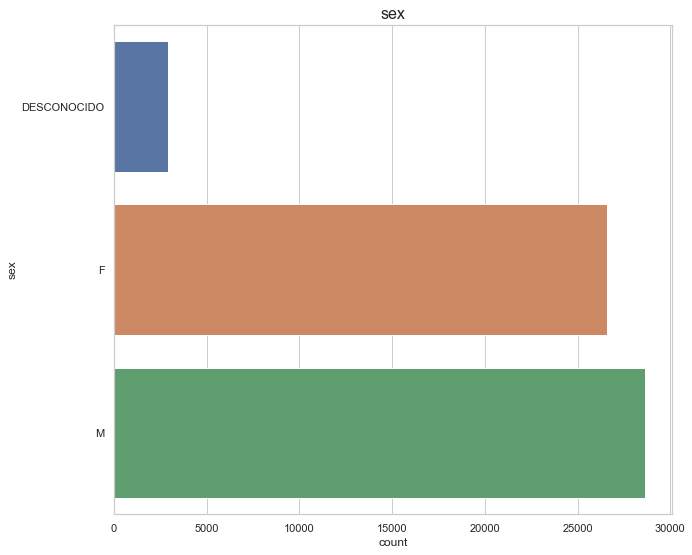

In [17]:
#Análisis de frecuencias de variables categóricas (excepto talle)
cat_columns=['ecommerce', 'store', 'linea', 'marca','ecomm_transporte_nombre','ColorPrimario','Disciplina','Genero','payment','sex']

for i in cat_columns:
    df[i] = df[i].str.rstrip()

for i in cat_columns:
    plt.figure(figsize=(10,9))
    plt.title(i,fontsize=16)
    plt.rcParams['figure.facecolor'] = 'White'
    sns.countplot(y=df[i])
    plt.show()

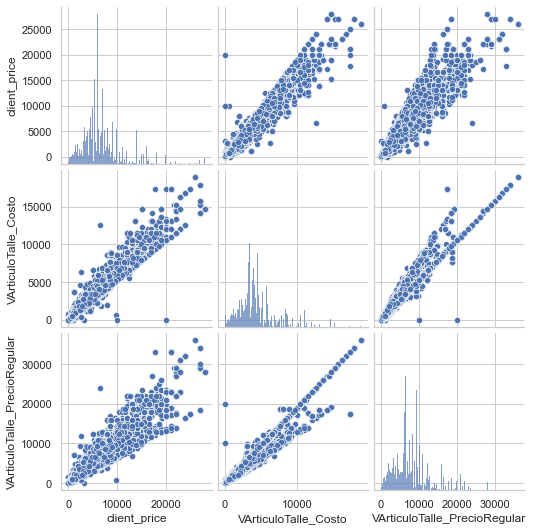

In [18]:
#Scatterplots para ver las relaciones entre todas las variables cuantitativas
sns.pairplot(df[['client_price','VArticuloTalle_Costo','VArticuloTalle_PrecioRegular']])
plt.show()

In [19]:
#Cálculo de la correlación entre variables
df.corr()

,quantity,client_price,VArticuloTalle_Costo,VArticuloTalle_PrecioRegular
quantity,1.000000,-0.027721,-0.031880,-0.029889
client_price,-0.027721,1.000000,0.958585,0.926105
VArticuloTalle_Costo,-0.031880,0.958585,1.000000,0.964889
VArticuloTalle_PrecioRegular,-0.029889,0.926105,0.964889,1.000000


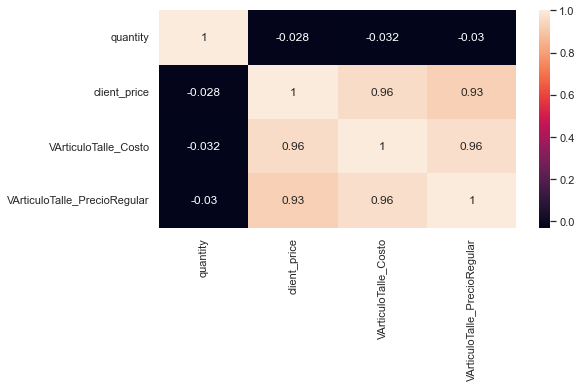

In [20]:
#Heatmap de la correlación
plt.subplots(figsize=(8, 4))
sns.heatmap(df.corr(),annot=True)
plt.show()

En base a los gráficos anteriores se puede notar que todas las variables de precio y costo están altamente correlacionadas positivamente (si una crece la otra también), lo cual tiene sentido ya que la ganancia se genera vendiendo a un precio superior al costo

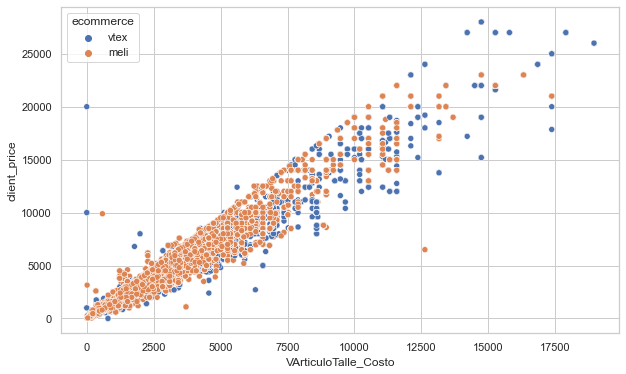

In [21]:
#Analizamos particularmente la relación entre el costo y el precio por ecommerce
plt.subplots(figsize=(10, 6))
sns.scatterplot(x='VArticuloTalle_Costo', y='client_price', hue='ecommerce', data=df)
plt.show()

Se puede notar que:

Para costos similares Meli en general vende a un mayor precio, por lo que es probable que genere mayor ganancia.
Hay algunos casos atípicos a analizar donde el costo es 0 y el artículo se vendió con un precio determinado.
Meli tiene mayor concentración de puntos en precios menores a 10000, por lo que es probable que genere mayor cantidad de ventas de productos en ese rango de precios.

In [22]:
#Agregamos la variable "ganancia" (precio - costo) para analizar algunas cuestiones en base a la misma
df["ganancia"] = df["client_price"] - df["VArticuloTalle_Costo"]
df[['client_price','VArticuloTalle_Costo','ganancia']]

,client_price,VArticuloTalle_Costo,ganancia
0,5439.2,4829.3400,609.8600
1,9499.0,6052.0000,3447.0000
2,3839.0,3315.2600,523.7400
3,799.0,526.6000,272.4000
4,8999.0,5365.9976,3633.0024
...,...,...,...
58164,5490.0,3452.1300,2037.8700
58165,2999.0,2833.6900,165.3100
58166,8999.0,4736.3200,4262.6800
58167,6319.0,4037.2300,2281.7700


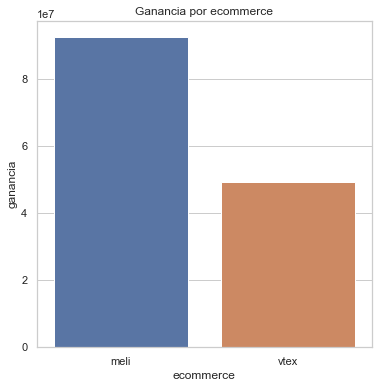

In [23]:
#Vemos cantidad de ventas y ganancia por ecommerce
cat = df[["ecommerce", "ganancia"]].groupby(['ecommerce'], as_index=False).sum().sort_values(by='ganancia', ascending=False)
plt.figure(figsize=(6,6))
sns.set_theme(style="whitegrid")
sns.barplot(x='ecommerce', y='ganancia', data=cat)
plt.title('Ganancia por ecommerce')
plt.show()

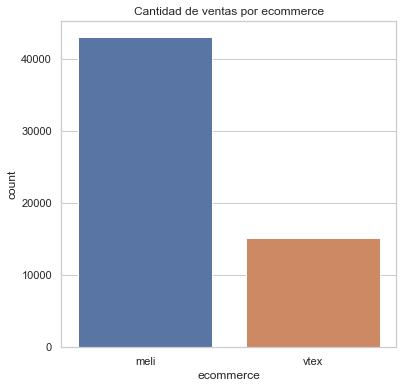

In [24]:
plt.figure(figsize=(6,6))
sns.set_theme(style="whitegrid")
sns.countplot(x = 'ecommerce',
              data = df,
              order = df['ecommerce'].value_counts().index)
plt.title('Cantidad de ventas por ecommerce')
plt.show()

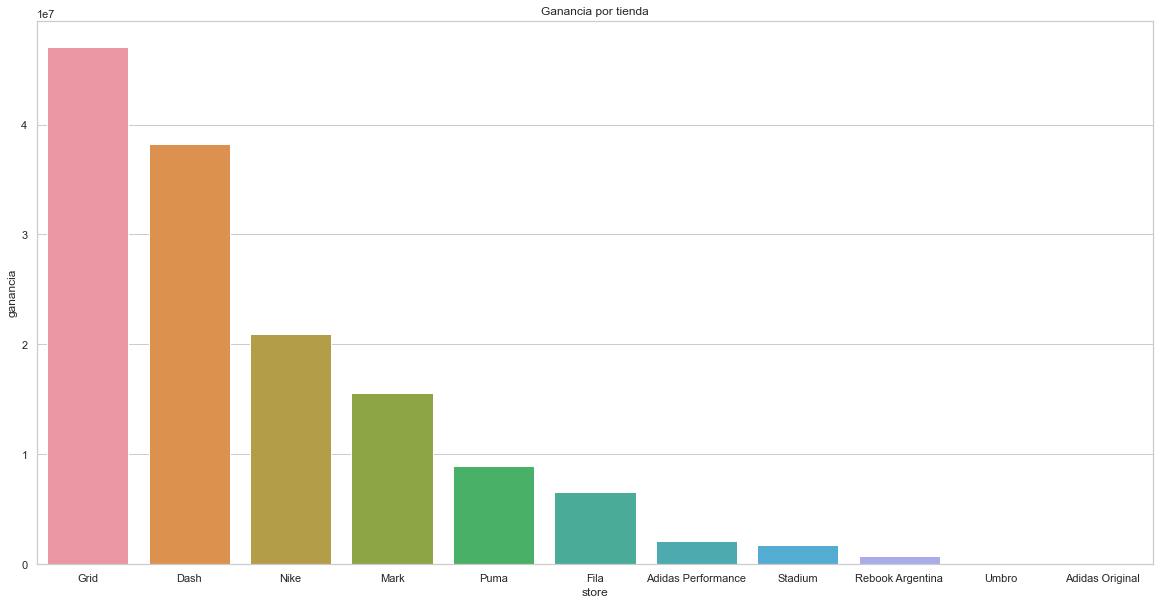

In [25]:
#Analizamos las ganancias por tienda
cat = df[["store", "ganancia"]].groupby(['store'], as_index=False).sum().sort_values(by='ganancia', ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x='store', y='ganancia', data=cat)
plt.title('Ganancia por tienda')
plt.show()

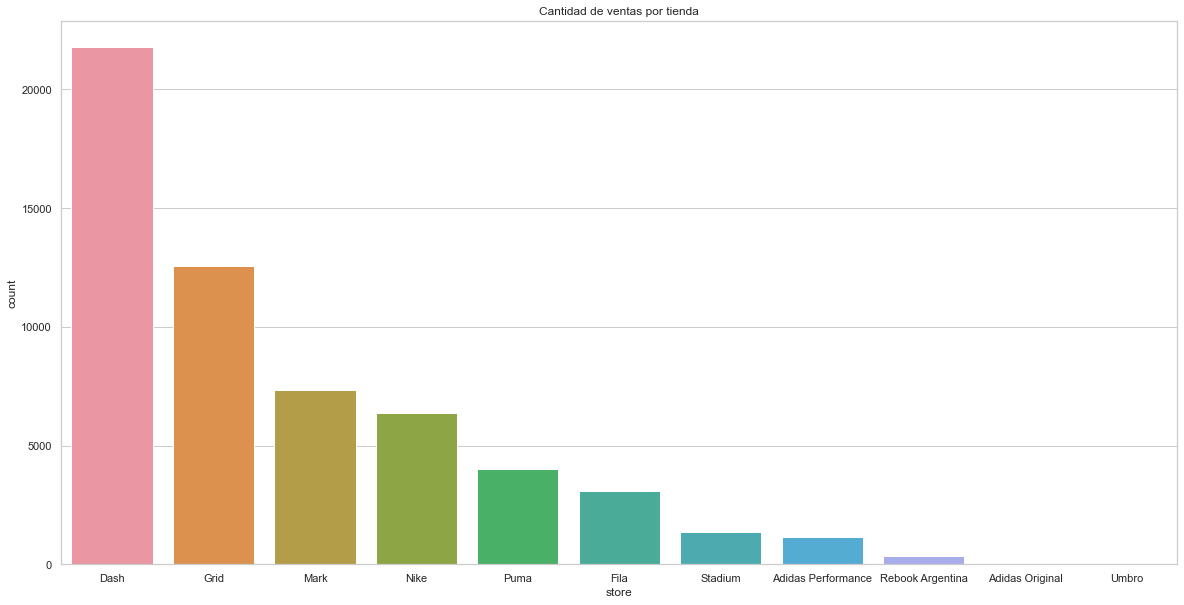

In [26]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.countplot(x = 'store',
              data = df,
              order = df['store'].value_counts().index)
plt.title('Cantidad de ventas por tienda')
plt.show()

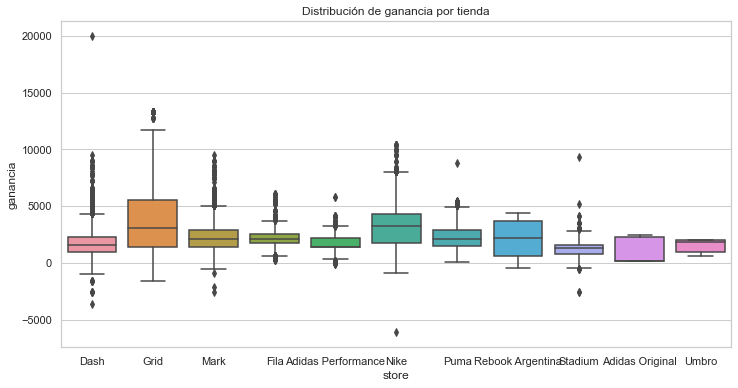

In [27]:
plt.subplots(figsize=(12, 6))
sns.boxplot(x=df['store'], y=df['ganancia'])
plt.title('Distribución de ganancia por tienda')
plt.show()

In [28]:
df[df['ganancia'] < -5000]

,ecomm_order_id,ecommerce,store,ecomm_creation_date_x,linea,marca,vArticulo_id,vTalle_Codigo,producto,quantity,client_price,VArticuloTalle_Costo,VArticuloTalle_PrecioRegular,ecomm_transporte_nombre,ColorPrimario,ProveedorId,Disciplina,Genero,sex,date_handling,date_invoiced,date_canceled,email,adress_id,latitude,longitude,payment,client_id,ganancia
43180,4333678921,meli,Nike,29/1/2021 02:14,CALZADO ADULTOS,NIKE,306-5639,09 *,Botines Nike Tiempo Legend 8 Pro Fg Hombre,1,6499.0,12631.05,23999.0,Transporte interno Essential,NEGRO,AT6133-004,FUTBOL,HOMBRE,M,Desconocido,29/1/2021 09:25,Desconocido,ttincho.61zfk1r+2-ogqztgmzwg44dsnrx@mail.merca...,Desconocido,Desconocido,Desconocido,digital_currency,81e7601002a411dc674f1219170eaf33,-6132.05


Se puede notar que:

La tienda "Grid" es la que mayor ganancia genera.
La segunda que mayor ganancia genera es "Dash", pero de acuerdo al boxplot tiene en promedio ganancias menores a varias de las tiendas y algunos outliers a analizar. También es la que mayor cantidad de ventas tiene.Ambas tienen pérdidas probablemente por las promociones que ofrecen.
"Nike" tiene un caso de pérdida mayor a 5000 que habría que analizar en detalle para ver si corresponde a un error de datos o hubo realmente una venta con esa pérdida.

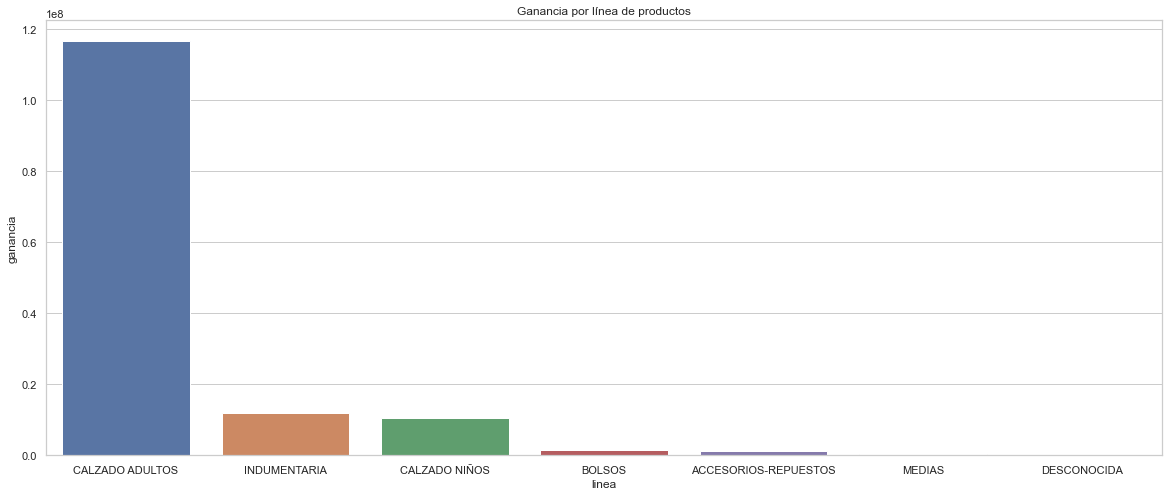

In [29]:
#Analizamos las ganancias por línea de producto
cat = df[["linea", "ganancia"]].groupby(['linea'], as_index=False).sum().sort_values(by='ganancia', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='linea', y='ganancia', data=cat)
plt.title('Ganancia por línea de productos')
plt.show()

In [30]:
#Análisis de ventas género vs tienda
pd.crosstab(df.Genero, df.store, normalize='columns')

store,Adidas Original,Adidas Performance,Dash,Fila,Grid,Mark,Nike,Puma,Rebook Argentina,Stadium,Umbro
Genero,,,,,,,,,,,
BEBE,0.000000,0.006076,0.010456,0.000000,0.012958,0.008725,0.014611,0.018431,0.000000,0.000000,0.000000
DESCONOCIDO,0.000000,0.004340,0.008714,0.000000,0.002226,0.004499,0.000314,0.005978,0.002941,0.002191,0.018182
HOMBRE,0.491803,0.221354,0.359826,0.437075,0.490421,0.519973,0.383346,0.499128,0.526471,0.293645,0.672727
MUJER,0.508197,0.629340,0.384499,0.500485,0.287066,0.324472,0.372506,0.428394,0.441176,0.408327,0.000000
NIÑA,0.000000,0.000868,0.011190,0.000000,0.001351,0.002181,0.011940,0.001245,0.000000,0.021914,0.000000
NIÑOS,0.000000,0.074653,0.151571,0.057263,0.133715,0.079891,0.162294,0.039352,0.017647,0.199416,0.272727
UNISEX,0.000000,0.063368,0.073745,0.005176,0.072263,0.060259,0.054988,0.007472,0.011765,0.074507,0.036364


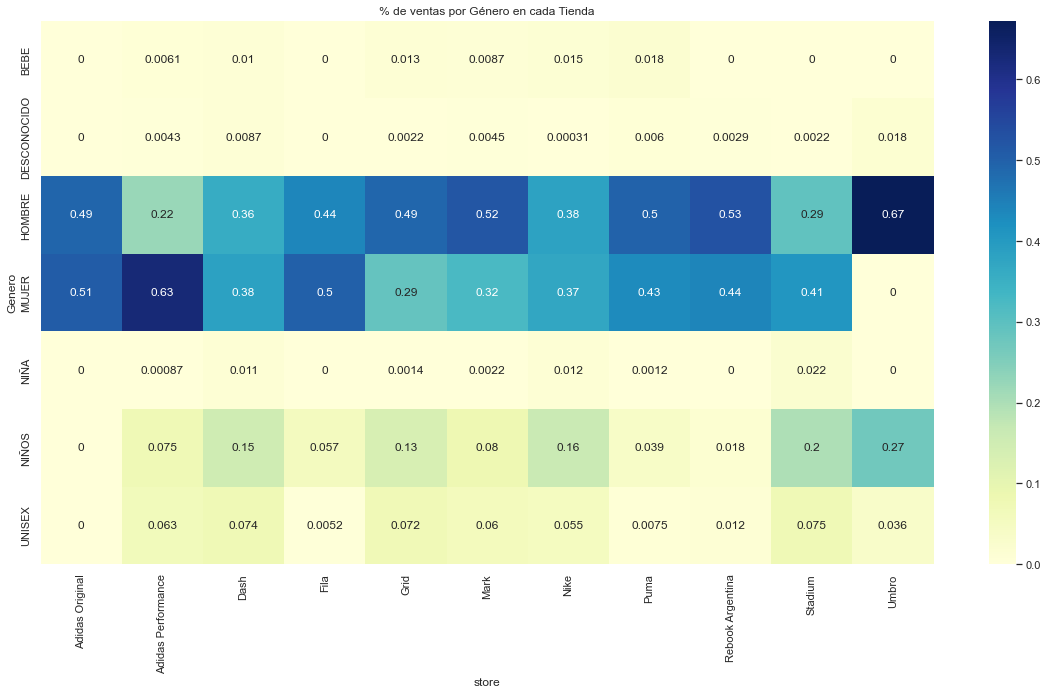

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df.Genero, df.store, normalize='columns'),
            cmap="YlGnBu", annot=True)
plt.title('% de ventas por Género en cada Tienda')
plt.show()

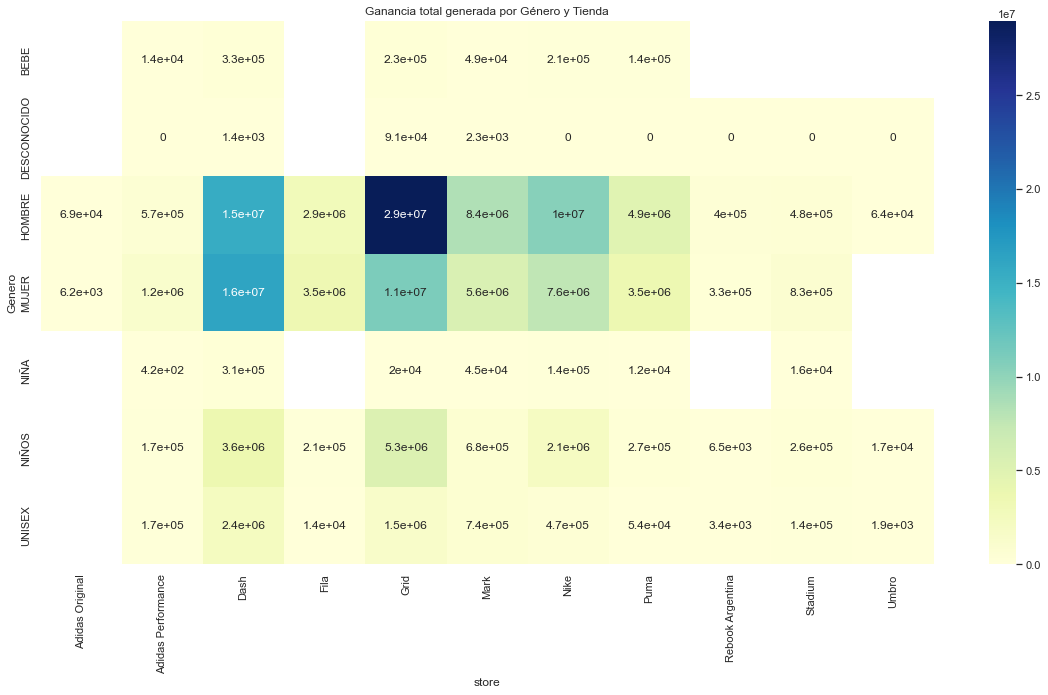

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df.Genero, df.store, values=df.ganancia, aggfunc='sum').round(0),cmap="YlGnBu", annot=True)
plt.title('Ganancia total generada por Género y Tienda')
plt.show()

Se puede notar que:

Casi todas las tiendas venden mayoritariamente productos para hombre y mujer, a excepción de "Umbro" que tiene un 50% de ventas en productos para niños.
La mayor ganancia la genera la tienda "Grid" con artículos para hombres, seguida de "Dash" con artículos para hombres y mujeres.

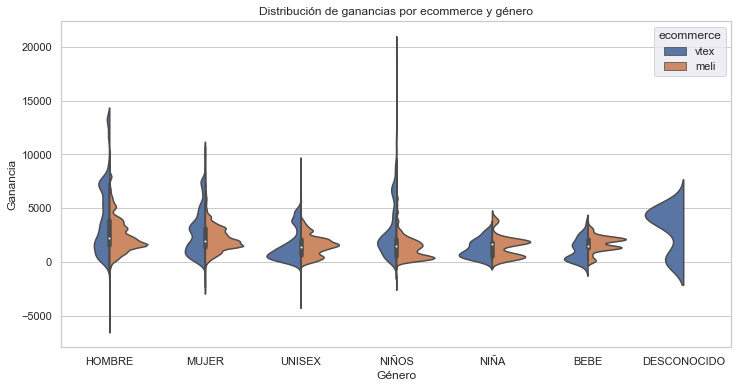

In [33]:
#Distribución de ganancias por ecommerce y género
fig, ax = plt.subplots(figsize=(12, 6))
sns.set()
ax = sns.violinplot(x='Genero', y='ganancia', hue='ecommerce',data=df, split=True)
ax.set(ylabel='Ganancia', xlabel='Género', title='Distribución de ganancias por ecommerce y género')
plt.show()

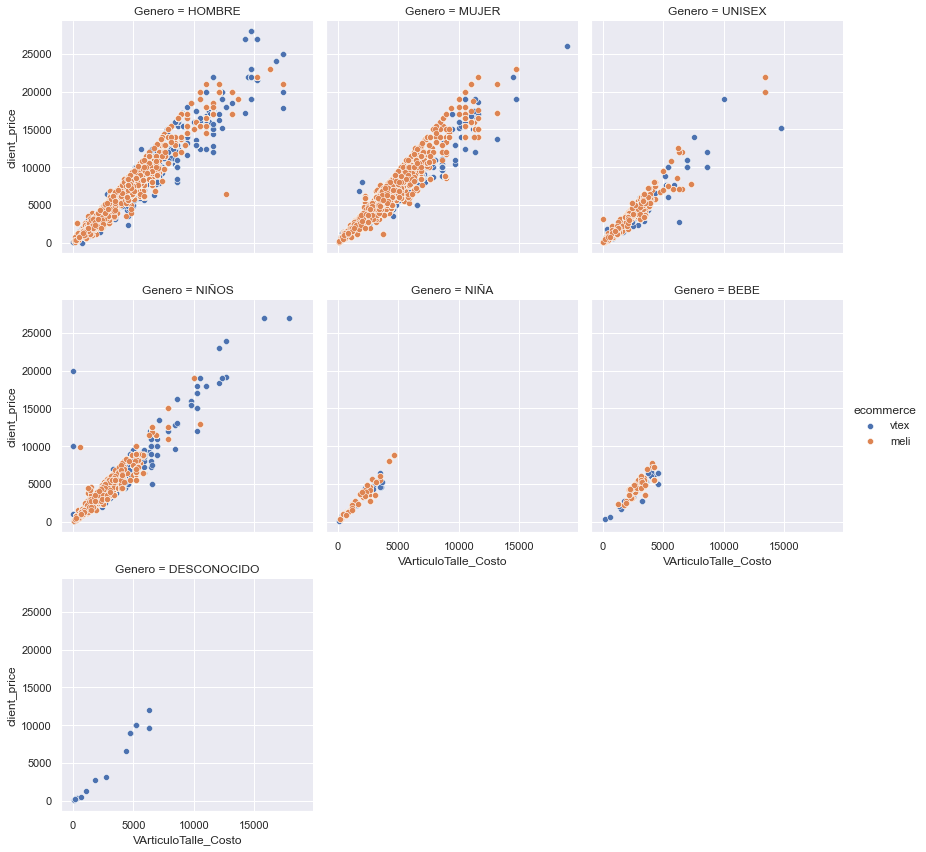

In [34]:
#Scatterplot precio y costo dividido por cada género y por ecommerce 
g = sns.FacetGrid(df, col="Genero",  hue="ecommerce", height=4, col_wrap=3)
g.map(sns.scatterplot, "VArticuloTalle_Costo", "client_price")
g.add_legend()
plt.show()

In [35]:
#Análisis de cantidad vendida y ganancia por disciplina
df_disciplina = pd.DataFrame(df.groupby('Disciplina').sum())[['quantity', 'ganancia']]
df_disciplina

,quantity,ganancia
Disciplina,,
ACCESORIOS,98,5.409630e+04
ATHLETIC,166,9.009943e+04
BASKET,4679,2.925274e+07
CLASSIC,63,2.917295e+04
CORE,83,2.337025e+05
DESCONOCIDA,350,1.461754e+05
ENTRENAMIENTO,12982,2.328932e+07
FUTBOL,3241,5.514999e+06
Generica,20,8.020800e+03


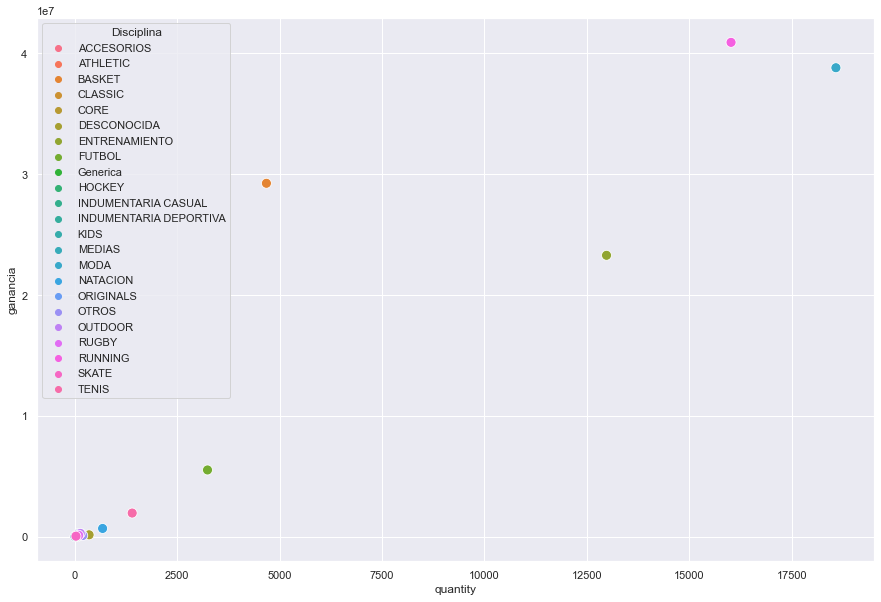

In [36]:
plt.subplots(figsize=(15, 10))
sns.scatterplot(x='quantity', y='ganancia', hue=df_disciplina.index, data=df_disciplina, s=100)
plt.show()

In [37]:
#Análisis de componentes principales para cada disciplina usando las variables cuantitativas
df_store = pd.DataFrame(df.groupby('Disciplina').sum())[['quantity','client_price','VArticuloTalle_Costo','VArticuloTalle_PrecioRegular']]
df_store

,quantity,client_price,VArticuloTalle_Costo,VArticuloTalle_PrecioRegular
Disciplina,,,,
ACCESORIOS,98,1.364189e+05,8.232260e+04,163362.0
ATHLETIC,166,2.941149e+05,2.040155e+05,325407.0
BASKET,4679,7.228745e+07,4.303471e+07,80008706.9
CLASSIC,63,9.778160e+04,6.860865e+04,118476.0
CORE,83,5.944083e+05,3.607059e+05,532217.0
DESCONOCIDA,350,1.998654e+06,1.607976e+05,266433.0
ENTRENAMIENTO,12982,6.483028e+07,4.154096e+07,75472777.4
FUTBOL,3241,1.495601e+07,9.442217e+06,16239669.9
Generica,20,3.468400e+04,2.666320e+04,49899.0


In [38]:
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_store)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
pca_pipe.fit(df_store)

pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df_store.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,quantity,client_price,VArticuloTalle_Costo,VArticuloTalle_PrecioRegular
PC1,0.492682,0.502023,0.502922,0.502302
PC2,-0.867456,0.329531,0.221279,0.299942
PC3,-0.027903,-0.749734,0.127858,0.648670
PC4,0.063297,0.277996,-0.825686,0.486780


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[9.85421312e-01 1.43560371e-02 1.47215967e-04 7.54348375e-05]


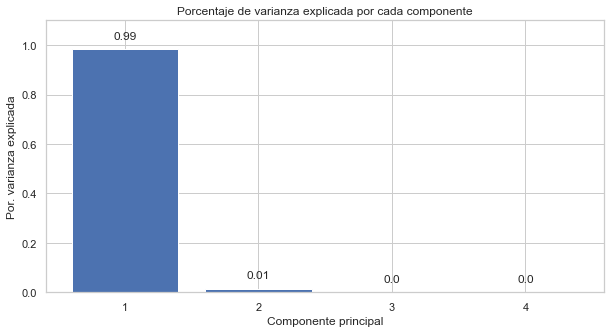

In [39]:
# Porcentaje de varianza explicada por cada componente
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)
import seaborn as sns
sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_store.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [56]:
# Proyección de las observaciones de entrenamiento
proyecciones = pca_pipe.transform(X=df_store)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index   = df_store.index
)
proyecciones

,PC1,PC2,PC3,PC4
Disciplina,,,,
ACCESORIOS,-0.948281,-0.003333,0.004113,-0.001292
ATHLETIC,-0.935220,-0.010638,0.003647,-0.001697
BASKET,2.368491,0.892641,-0.051870,0.015924
CLASSIC,-0.952891,0.001558,0.004332,-0.002042
CORE,-0.932834,0.008595,0.001883,-0.003514
DESCONOCIDA,-0.896047,-0.025794,-0.034017,0.014517
ENTRENAMIENTO,2.945229,-0.573834,-0.018283,0.057114
FUTBOL,-0.055728,-0.174929,-0.020976,0.005567
Generica,-0.959476,0.007089,0.004580,-0.002350


Text(0, 0.5, 'PC2')

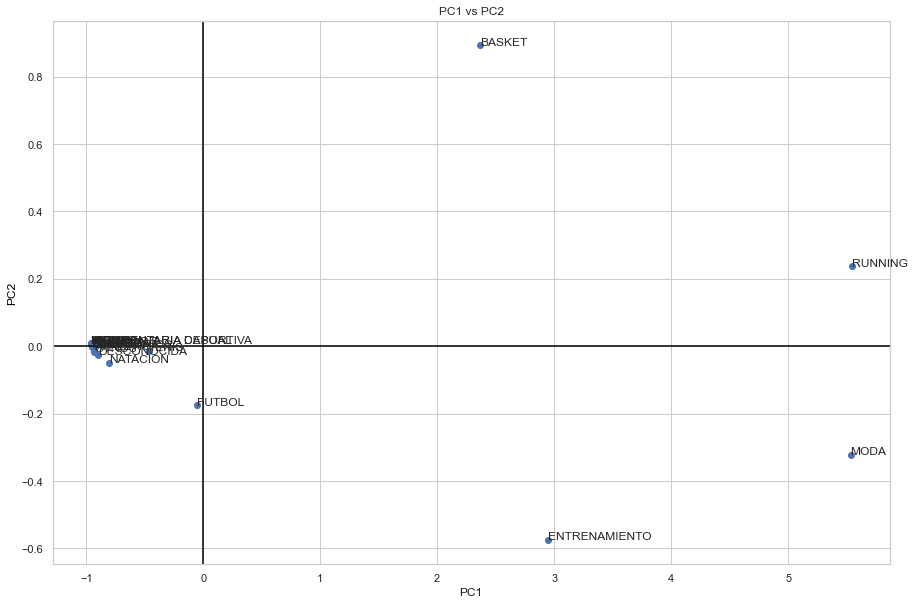

In [57]:
#Graficamos PC1 vs PC2 para ver relación entre disciplinas
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
proyecciones['val']=proyecciones.index

ax = proyecciones.set_index('PC1')['PC2'].plot(style='o')

def label_point(x, y, val, ax):
  a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
  for i, point in a.iterrows():
    ax.text(point['x'], point['y'], str(point['val']))

label_point(proyecciones.PC1, proyecciones.PC2, proyecciones.val, ax)
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.title('PC1 vs PC2')
plt.xlabel('PC1',color='k')
plt.ylabel('PC2',color='black')

Utilizando el algoritmo k-means agruparemos a los clientes en clusters de acuerdo a dos variables:
- recurrencia de compra (cantidad de transacciones que realizaron)
- cantidad de dinero que gastaron (suma del precio de los productos que adquirieron)

In [79]:
from sklearn.cluster import KMeans #importamos la librería

#Armamos un dataset filtrado con los datos que necesitamos, eliminando los registros con precio nulo
df_k = df.dropna(subset=['client_price']).groupby('client_id')['client_price'].agg(spent ='sum', transactions= 'count')
df_k=df_k.reset_index()
df_k=df_k[['spent','transactions']]
df_k.sort_values(by='transactions', ascending=False).head()

,spent,transactions
21361,464084.2,92
3168,1233950.0,50
42004,67641.0,34
38040,129914.6,29
15822,110503.0,27


In [76]:
# Standarización de datos
scaler = StandardScaler()
df_k_std = scaler.fit_transform(df_k)

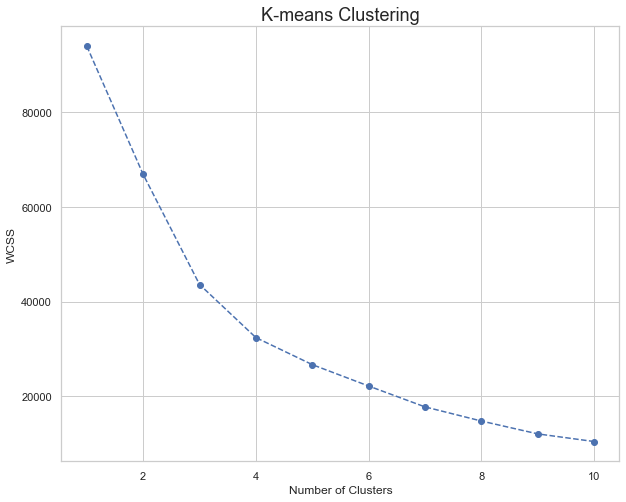

In [77]:
#Aplicamos el elbow method para encontrar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_k)
    wcss.append(kmeans.inertia_)

# Ploteamos el resultado para conocer cuantos clusters serán mejor analizar
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering',fontsize=18)
plt.show()

De acuerdo al gráfico obtenido con el Elbow Method determinamos que lo óptimo es armar 4 clústers

In [78]:
#Creamos el k-Means con 4 grupos / clústers
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 47)
kmeans.fit_predict(df_k_std)

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
#Analizamos los promedios para cada grupo
df_k['pred']= kmeans.labels_
df_k.groupby(['pred']).mean().round()

,spent,transactions
pred,,
0,7109.0,1.0
1,15098.0,2.0
2,51487.0,8.0
3,849017.0,71.0


In [81]:
#Vemos la cantidad de clientes que quedó en cada grupo
df_k['pred'].value_counts()

0    40078
1     6580
2      282
3        2
Name: pred, dtype: int64

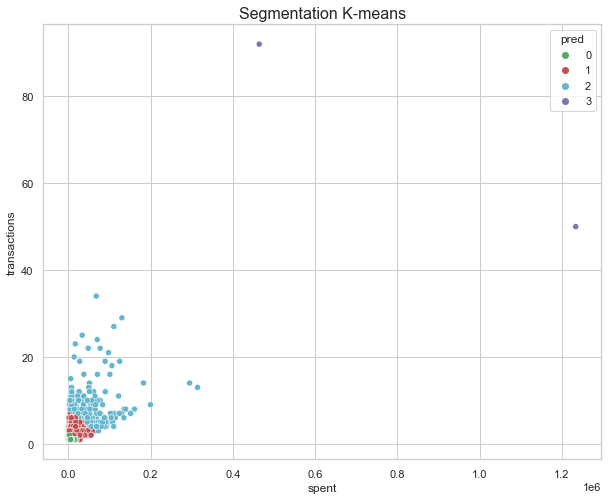

In [94]:
# Ploteamos los resultados del Algoritmo K-means
x_axis = df_k['spent']
y_axis = df_k['transactions']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_k['pred'], palette = ['g', 'r', 'c','m'])
plt.title('Segmentation K-means',fontsize=16)
plt.show()

En conclusión:
- El grupo 0 contiene la mayor cantidad de clientes, que solo compraron, en promedio, 1 vez y gastaron poco en promedio
- El grupo 1 contiene un único cliente que compró 50 veces y gastó mucha cantidad de dinero. Se debería
analizar si corresponde a un error o es algún cliente especial.
- El grupo 2 contiene clientes recurrentes que gastan montos considerables de dinero.
- El grupo 3 contiene clientes que compran esporádicamente o compraron una vez pero gastaron más que la mayoría.

Ahora vamos a elegir un algoritmo de clasificación para predecir cuál es el mejor ecommerce (vtex o meli) para publicar un artículo y aumentar las chances de que se venda en base a su precio, la tienda y la línea del producto

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier #Árbol de decisión
from sklearn.ensemble import RandomForestClassifier #Random forest
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.metrics import accuracy_score #para calcular precisión de modelos

In [ ]:
#Creamos un dataset reducido con los datos que vamos a utilizar para los algoritmos
df2 = df[['client_price','store','linea', 'ecommerce']]

#Validamos la cantidad de datos no nulos
df2.count()

In [97]:
#Normalizamos los datos
#linea: quitamos los espacios y remplazamos los NaN por "DESCONOCIDA"
df2['linea'] = df2['linea'].str.strip()
df2['linea'] = df2['linea'].fillna('DESCONOCIDA')

#client_price: reemplazamos los NaN por 0
df2['client_price'] = df2['client_price'].fillna(0)

#Validamos que no haya más NaN
df2.count()

client_price    58167
store           58167
linea           58167
ecommerce       58167
dtype: int64

ecommerce
meli    43073
vtex    15094
dtype: int64


Número de registros 58167


La porporción de "vtex" es: 74.05 %
La porporción de "Meli" es: 25.95 %




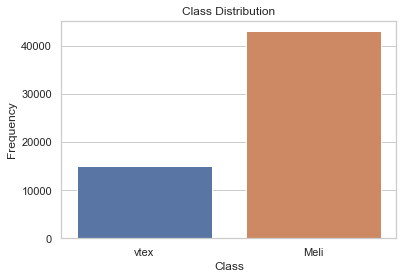

In [98]:
class_counts = df2.groupby('ecommerce').size()
print(class_counts)
print('\n')
print('Número de registros',len(df))
print('\n')
print('La porporción de "vtex" es:',round(class_counts[0]/len(df)*100,2),'%')
print('La porporción de "Meli" es:',round(class_counts[1]/len(df)*100,2),'%')
print('\n')

LABELS = ["vtex", "Meli"]
count_classes = sns.countplot(df2['ecommerce'])
count_classes.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [99]:
#Aplicamos one hot encoding para convertir las variables categóricas
df_final = pd.get_dummies(df2, drop_first=True)
df_final

,client_price,store_Adidas Performance,store_Dash,store_Fila,store_Grid,store_Mark,store_Nike,store_Puma,store_Rebook Argentina,store_Stadium,store_Umbro,linea_BOLSOS,linea_CALZADO ADULTOS,linea_CALZADO NIÑOS,linea_DESCONOCIDA,linea_INDUMENTARIA,linea_MEDIAS,ecommerce_vtex
0,5439.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,9499.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,3839.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
3,799.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
4,8999.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58164,5490.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
58165,2999.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
58166,8999.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
58167,6319.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [128]:
#Dado que la variable a predecir será el ecommerce, la eliminamos del dataset
X = df_final.drop("ecommerce_vtex", axis=1)
X

,client_price,store_Adidas Performance,store_Dash,store_Fila,store_Grid,store_Mark,store_Nike,store_Puma,store_Rebook Argentina,store_Stadium,store_Umbro,linea_BOLSOS,linea_CALZADO ADULTOS,linea_CALZADO NIÑOS,linea_DESCONOCIDA,linea_INDUMENTARIA,linea_MEDIAS
0,5439.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,9499.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,3839.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,799.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,8999.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58164,5490.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
58165,2999.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
58166,8999.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
58167,6319.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [101]:
# Standarización de datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [102]:
#Definimos la variable a predecir
y = df_final.ecommerce_vtex
y

0        1
1        1
2        1
3        1
4        1
        ..
58164    0
58165    0
58166    0
58167    0
58168    0
Name: ecommerce_vtex, Length: 58167, dtype: uint8

In [90]:
#Nos quedamos con 30% de datos para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [103]:
from imblearn.combine import SMOTETomek

smoteT = SMOTETomek(random_state=38)

X_train, y_train = smoteT.fit_resample(X_train, y_train)

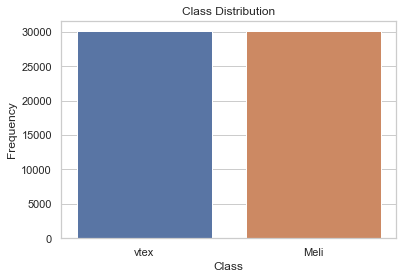

In [104]:
LABELS = ["vtex", "Meli"]
count_classes = sns.countplot(y_train)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [91]:
#Creamos distintos modelos para probar las predicciones y elegir uno

#KNN con n_neighbors=3
knn = KNeighborsClassifier(n_neighbors=3)

#Regresión logística
regresion_logistica = LogisticRegression()

#Random Forest con 200 árboles
random_forest = RandomForestClassifier(random_state=11, n_estimators=200)

In [105]:
#Entrenamos los modelos

KNN=knn.fit(X_train, y_train) #knn
LR=regresion_logistica.fit(X_train, y_train) #regresion logistica
RF=random_forest.fit(X_train, y_train) #random forest

In [109]:
#Predicción de los modelos en train y test

#knn
KNN_Predictions_train = knn.predict(X_train) 
KNN_Predictions = knn.predict(X_test)

#regresion logistica
LR_Predictions_train = regresion_logistica.predict(X_train) 
LR_Predictions = regresion_logistica.predict(X_test)

#random forest
RF_Predictions_train = random_forest.predict(X_train) 
RF_Predictions = random_forest.predict(X_test)

In [107]:
from sklearn.model_selection import cross_val_score
print("Cross Validation Regresion logística: ",cross_val_score(LR,X_train,y_train).mean())
print("Cross Validation KNN: ",cross_val_score(KNN,X_train,y_train).mean())
print("Cross Validation Random Forest: ",cross_val_score(RF,X_train,y_train).mean())

Cross Validation Regresion logística:  0.8390518393750541
Cross Validation KNN:  0.830143272112203
Cross Validation Random Forest:  0.8817907876947318


In [111]:
#Evaluate the models

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve,precision_score, recall_score,accuracy_score,classification_report

print("Regresión logística -> ", "Accuracy: ", round(accuracy_score(y_test, LR_Predictions),2), "Precision: ", round(precision_score(y_test, LR_Predictions),2), "Recall: ", round(recall_score(y_test, LR_Predictions),2),"AUC:",round(roc_auc_score(y_test, LR_Predictions),2))
print("Random Forest -> ", "Accuracy: ", round(accuracy_score(y_test, RF_Predictions),2), "Precision: ", round(precision_score(y_test, RF_Predictions),2), "Recall: ", round(recall_score(y_test, RF_Predictions),2),"AUC:",round(roc_auc_score(y_test, RF_Predictions),2))
print("KNN -> ", "Accuracy: ", round(accuracy_score(y_test, KNN_Predictions),2), "Precision: ", round(precision_score(y_test, KNN_Predictions),2), "Recall: ", round(recall_score(y_test, KNN_Predictions),2),"AUC:",round(roc_auc_score(y_test, KNN_Predictions),2))

Regresión logística ->  Accuracy:  0.85 Precision:  0.68 Recall:  0.8 AUC: 0.84
Random Forest ->  Accuracy:  0.88 Precision:  0.75 Recall:  0.84 AUC: 0.87
KNN ->  Accuracy:  0.89 Precision:  0.8 Recall:  0.75 AUC: 0.84


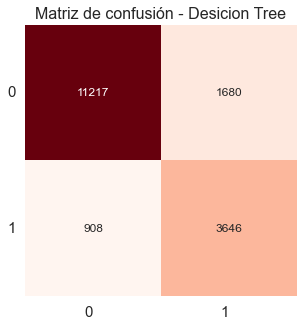

In [112]:
# Matriz de confusión - Regresión Logística

cm_t = confusion_matrix(y_test, LR_Predictions)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(cm_t, 
                     square=True,
                     cmap="Reds",
                     annot=True,
                     fmt="d",
                     cbar=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right',fontsize = 15)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right',fontsize = 15)
plt.title('Matriz de confusión - Desicion Tree',fontsize = 16)
plt.show()

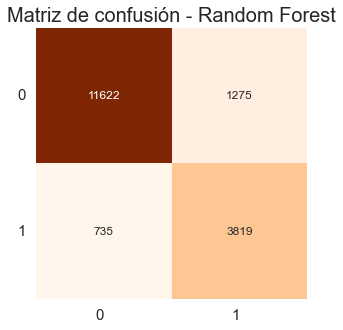

In [113]:
# Matriz de confusión - Ranfom Forest
cm_t = confusion_matrix(y_test, RF_Predictions)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(cm_t, 
                     square=True,
                     cmap="Oranges",
                     annot=True,
                     fmt="d",
                     cbar=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right',fontsize = 15)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right',fontsize = 15)
plt.title('Matriz de confusión - Random Forest',fontsize = 20)
plt.show()

### Hiperparameter Tuning

#### Vemos que el modelo que mejor se adapta los datos es el Random Forest. Intentaremos ajustar sus parámetros para conocer si es posible mejorar su performance.

In [115]:
# Numero de Árboles del Random Forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 60, num = 10)]
# Numero de caracterísiticas a considerar en cada split
max_features = ['auto', 'sqrt']
# Número máximo de niveles por Arbol.
max_depth = [2,4,5]
# Número mínimo de muestras necesarias para dividir un nodo.
min_samples_split = [2,4,5]
# Número mínimo de muestras necesarias en cada nodo hoja.
min_samples_leaf = [1,2,5]
# Método de selección de muestras para entrenar cada árbol.
bootstrap = [True, False]

In [116]:
from sklearn.model_selection import GridSearchCV

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#Stating the Grid Search

RF_grid = GridSearchCV(RF, param_grid, cv = 5, n_jobs = -1, scoring = 'precision')

#Entrenamos con los datos de entreno...
RF_grid.fit(X_train,y_train)

#Pintamos los resultados:
print("Best parameters: ")
print(RF_grid.best_params_)

Best parameters: 
{'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


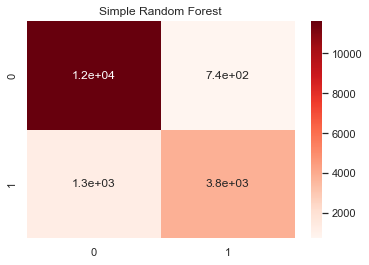

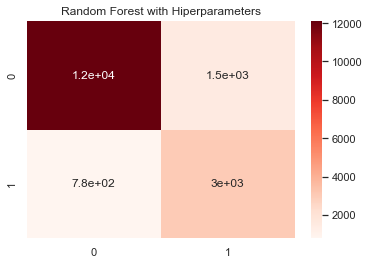

In [117]:
RF_grid_Predictions = RF_grid.predict(X_test)

#Obtención de la matriz
arrayRF = confusion_matrix(RF_Predictions, y_test)
arrayRFGrid = confusion_matrix(RF_grid_Predictions, y_test)
df_cmRF = pd.DataFrame(arrayRF)
df_cmRFGrid = pd.DataFrame(arrayRFGrid)

#Representación de la matriz de confusión
sns.set(font_scale=1)
plt.title('Simple Random Forest')
plt.show(sns.heatmap(df_cmRF, annot=True, cmap = 'Reds')) 
plt.title('Random Forest with Hiperparameters')
plt.show(sns.heatmap(df_cmRFGrid, annot=True , cmap = 'Reds'))

In [118]:
print("Random Forest Grid -> ", "Accuracy: ", round(accuracy_score(y_test, RF_grid_Predictions),2), "Precision: ", round(precision_score(y_test, RF_grid_Predictions),2), "Recall: ", round(recall_score(y_test, RF_grid_Predictions),2),"AUC:",round(roc_auc_score(y_test, RF_grid_Predictions),2))
print()
print("Random Forest -> ", "Accuracy: ", round(accuracy_score(y_test, RF_Predictions),2), "Precision: ", round(precision_score(y_test, RF_Predictions),2), "Recall: ", round(recall_score(y_test, RF_Predictions),2),"AUC:",round(roc_auc_score(y_test, RF_Predictions),2))

Random Forest Grid ->  Accuracy:  0.87 Precision:  0.8 Recall:  0.67 AUC: 0.8

Random Forest ->  Accuracy:  0.88 Precision:  0.75 Recall:  0.84 AUC: 0.87


In [119]:
from sklearn.metrics import confusion_matrix,classification_report

print('Random Forest Grid metrics')
print(classification_report(y_test, RF_grid_Predictions))

Random Forest Grid metrics
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     12897
           1       0.80      0.67      0.73      4554

    accuracy                           0.87     17451
   macro avg       0.84      0.80      0.82     17451
weighted avg       0.86      0.87      0.86     17451



No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

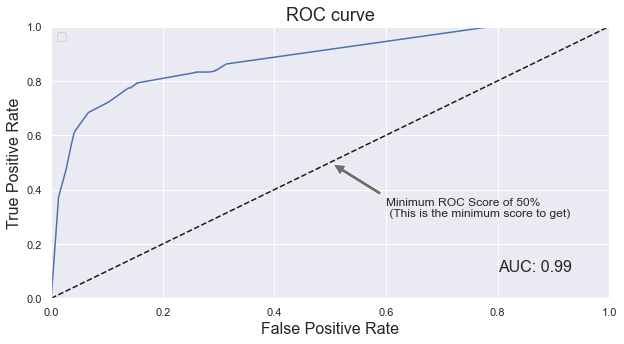

In [120]:
# Curva ROC
predictions = RF_grid.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

# Grafico de la curva ROC
plt.clf()
plt.figure(figsize=(10,5))
plt.title('ROC curve', fontsize=18)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('AUC: 0.99', xy=(0.5, 0.5), xytext=(0.8, 0.1), fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),arrowprops=dict(facecolor='#6E726D', shrink=0.05),)
plt.legend()
plt.show()

Conclusión: De acuerdo al accuracy todos tienen similares valores entre train y test, pero el Random Forest alcanzó un 90% de precisión sobre el set de evaluación, por lo que es un muy buen modelo y el mejor a elegir para este caso

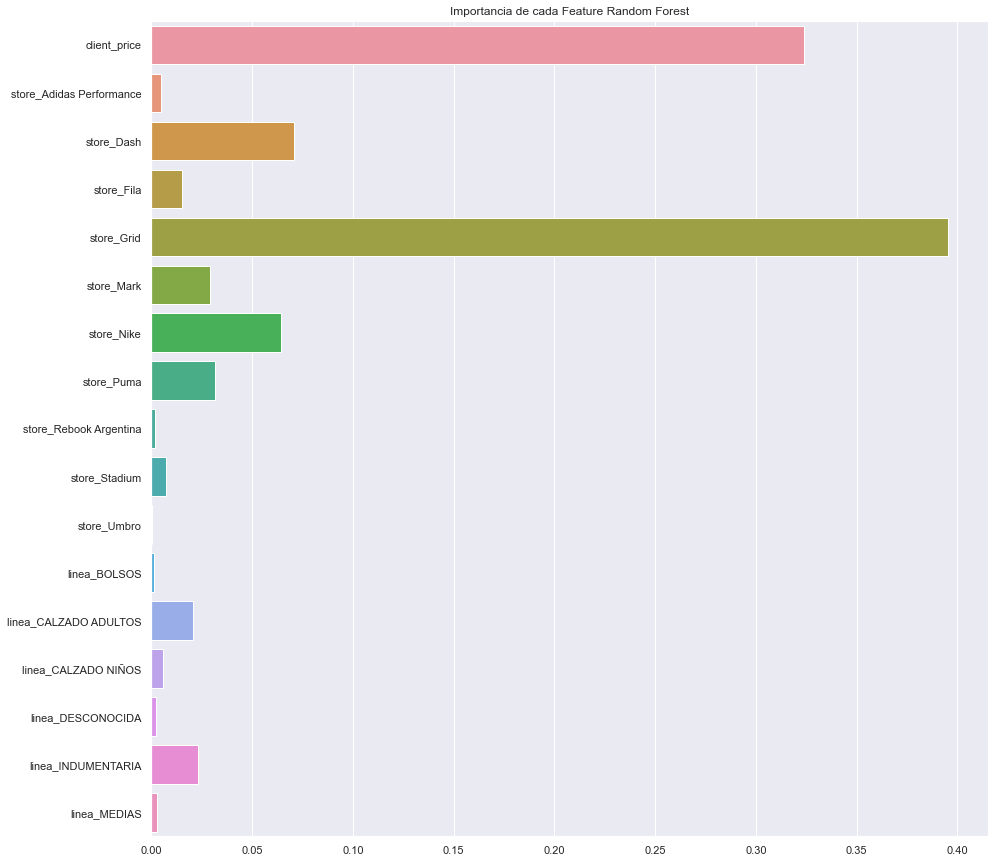

In [129]:
#Calculamos la importancia de las variables para el random forest

plt.figure(figsize=(15,15))
importances = random_forest.feature_importances_
columns = X.columns
sns.barplot(importances, columns)
plt.title('Importancia de cada Feature Random Forest')
plt.show()

Como se puede notar en el gráfico las variables que más peso tienen para el algoritmo son:
1. La tienda que vende el producto es Grid
2. El precio del producto
3. La tienda que vende el producto es Dash o Nike

In [ ]:
import pickle

#File Name
filename = 'Random-Forest-Grid.model'

#We save the model
pickle.dump(RF_grid, open(filename, 'wb'))